We will use the athlete data from the previous noptebook. 
Load it into 2 arrays again. 

In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

In [2]:
#PLEASE TAKE A LOOK AT THE NOTE IN THE COMMENTS IN THIS BLOCK.
dfNBA = pd.read_csv("NBA.csv")
dfNFL = pd.read_csv("NFL.csv")

#Take the height column and make a 1D dataframe, with only 1 column
nba = dfNBA["Height"]
nfl = dfNFL["Height (inches)"]
#################################################################
#Note: Originally when I showed this, the above two lines were slightly different. 
#They were (with the A added, obviously):
nbaA = np.array(dfNBA["Height"])
nflA = np.array(dfNFL["Height (inches)"])
#This code makes a slightly different data structure - a numpy array. 
#An array is a 1D data structure - effectively just a big list. 
#The code below works basically the same with either. That's because both are "iterable"
#That means (basically), something that has can give values one at a time. 
#Functions below can take either, with little/no change, or they can take a pandas Series
#Which is kind of a pandas take on an array. I point this out for a few reasons:
# - Examples will sometimes show different data structures, and the rest of the code doesn't really change.
# - Some things will need other data structures, most notably ML needs arrays.
#We don't need to understand the problem differently when different data structures are used.
#It is basically like getting groceries with a bin, a reusable bag, or a plastic bag.
#The all allow us to do the same thing (grocery shop/Machine Learn), and they can be used
#Largely interchabably. Sometimes one is better than the other for a specific task. 
#This type of thing is very common - you can do anything you want in code, so there are almost
#Always more than one way to do something. Flexible, but confusing. 

#Dump the non-numbers
nba = nba[~np.isnan(nba)]
nfl = nfl[~np.isnan(nfl)]

Check to make sure that the data loaded and is good to go.

In [3]:
#Check the means
print("NBA Mean Height: "+str(np.mean(nba)))
print("NFL Mean Height: "+str(np.mean(nfl)))

NBA Mean Height: 197.44075829383885
NFL Mean Height: 73.50839891929989


In [4]:
#Correct the heights to cm, so they are the same as NBA
#This .apply() applies the function inside to an entire DF
#The "lambda x" basically means "grab each row one by one, and that row is (temporarily) x"
#The part after the colon means "take x, and do this to it"
#So this will, more or less, grab each row, and do the function after the colon, one row at a time.
nfl = nfl.apply(lambda x: x*2.54)
nfl

0        180.34
1        177.80
2        187.96
3        185.42
4        195.58
          ...  
17167    180.34
17168    190.50
17169    182.88
17170    185.42
17171    185.42
Name: Height (inches), Length: 17026, dtype: float64

In [5]:
#Check the means again
print("NBA Mean Height: "+str(np.mean(nba)))
print("NFL Mean Height: "+str(np.mean(nfl)))

NBA Mean Height: 197.44075829383885
NFL Mean Height: 186.71133325500546


In [18]:
nba.describe()

count    422.000000
mean     197.440758
std        8.740250
min      172.500000
25%      190.000000
50%      197.500000
75%      205.000000
max      222.500000
Name: Height, dtype: float64

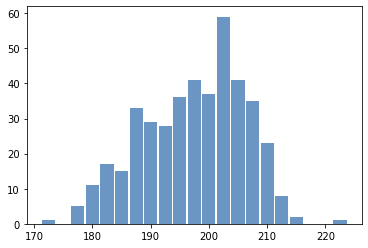

In [17]:
nbahist = thinkstats2.Hist(nba)
thinkplot.PrePlot(1)
thinkplot.Hist(nbahist)
thinkplot.Config()

The previous 2 methods of looking at the distribution showed us versions of "how many of X are Y" - e.g. how many players are 187cm tall. 

We may also want/need to look at cumulative measurements - "how many of X are over/under Y" - e.g. how many players are over 215cm, or under 172.523cm. Enter percentiles...

Percentiles measure how far along the scale a value is - how many items a value is larger than, and the inverse, how many are higher than it. E.g. if you are in a class of 10 people, and you are the second tallest, you are in the 90th percentile of height - 90% of people in that sample are the same or shorter than you; the remaining 10% are taller. If you've been scored on a standardized test, you've probably gotten some kind of number like this. (The book has a more thorough explationation of percentile stuff)

In order to calculate things, we need two functions that are basically inverses of eachother. Percentile rank takes in a value and calculates what percentile that is in. Percentile does the opposite, takes in a percentile, and calculates the value. (Read the book on this, it has the details)
Percentile rank: value->ranking on percentile scale. e.g. I scored 72%, and the function tells me I'm in the 80th percentile. 
percentile: ranking->value. e.g. I'm in the 64th percentile of my graduating class, that means I have a 3.1 GPA.

In [6]:
#The percentile functions
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

The CDF is basically a different look at the percentile rank - given a value, how far "up the scale" are we.

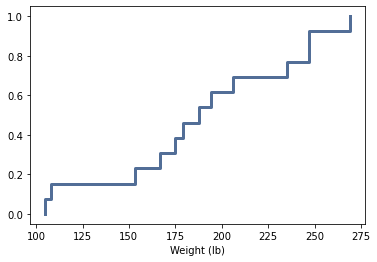

<Figure size 576x432 with 0 Axes>

In [7]:
#Simple dummy example
#Pretend these are weights in pounds
sample = thinkstats2.Cdf([105,235,153,194,175,206,167,188,179,108,247,269,247])
thinkplot.Cdf(sample)
thinkplot.Show(xlabel="Weight (lb)")

We can read these CDF graphs like this... If I am 225lb, I can look that up on the x-axis. The corresponding y value is my percentile rank - I'm in apx the 70th percentile, or I'm heavier than about 70% of the people in the sample. 

How does the shape of a CDF relate to the shape of a PDF? With different standard deviations? Create a CDF with the numbers 1-10, what does that look like? What can you infer about the distribution?

Create a CDF for both the NBA and NFL heights. How does that relate back to the histograms? 

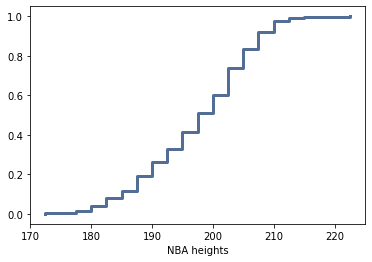

<Figure size 576x432 with 0 Axes>

In [8]:
#Create and show CDF of NBA heights
nbacdf = thinkstats2.Cdf(nba)
thinkplot.Cdf(nbacdf)
thinkplot.Show(xlabel="NBA heights")


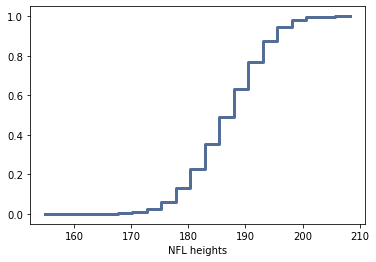

<Figure size 576x432 with 0 Axes>

In [9]:
#Create and show CDF of NFL heights
nflcdf = thinkstats2.Cdf(nfl)
thinkplot.Cdf(nflcdf)
thinkplot.Show(xlabel="NFL heights")

Ok, we can run some calculations. 

In [10]:
#Note: The reason for this conversion and rounding is so that there are more results for each
#value because inches are "bigger". This isn't "needed", but it makes this more demonstrative

#Make both into inches, round to 1 inch
#The reason for this is to make more results fall in each number, so some demos are easier.
nbaIn = nba.apply(lambda x: x/2.54)
nflIn = nfl.apply(lambda x: x/2.54)
nbaIn = round(nbaIn, 0)
nflIn = round(nflIn, 0)
#Make CDF objects with the rounded stuff
nbaRounded = thinkstats2.Cdf(nbaIn)
nflRounded = thinkstats2.Cdf(nflIn)

In [11]:
nflIn.describe()

count    17026.000000
mean        73.508399
std          2.577632
min         61.000000
25%         72.000000
50%         74.000000
75%         75.000000
max         82.000000
Name: Height (inches), dtype: float64

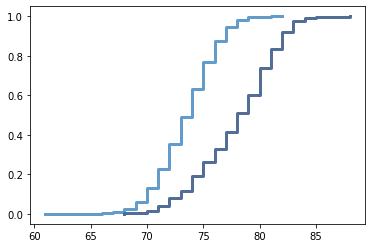

<Figure size 576x432 with 0 Axes>

In [12]:
# both cdf in same graph
thinkplot.Cdfs([nbaRounded, nflRounded])
thinkplot.Show()

In [13]:
# What is my percentile rank in NFL, if i am 73 inches tall?
# Rank myself in terms of NFL heights
print("nfl rank: ",nflRounded.PercentileRank(73))

# Rank myself in terms of NBA heights
print("nba rank: ",nbaRounded.PercentileRank(73))

# it shows people in nba are taller. (Im in low rank in nba)

nfl rank:  48.92517326441912
nba rank:  11.61137440758294


In [14]:
# how tall I should be, to be in 85th percentile of NFL?
# if I need to be taller than 85% of people in NFL
print("nfl: ",nflRounded.Percentile(85))

# if I need to be taller than 85% of people in NBA
print("nba: ",nbaRounded.Percentile(85))

nfl:  76.0
nba:  82.0


In [15]:
#E.g. What is the probability that someone in the NBA is 80in tall
nbaRounded.Prob(80)
#And if we want to see in in pretty printing
print(str(round(nbaRounded.Prob(80), 3)*100)+"%")

#And if someone is over 74in in the NFL?
#Think about why there's the extra math in there.
res = PercentileRank(nflIn, 74)
print(res)
print(str(round((1-res), 1)*-1)+"%")


73.9%
63.32080347703512
62.3%


In [16]:
#Using the Percentile/Rank functions, and the CDF functions on pg 49 of the book
#Can you look for anything interesting in the data?
#Who's over X, who's under? How you'd your height score on the scale?
#If someone is in the top 20% of NFL height, how to they rank in the NBA?
#How many people are shorter than you (or a friend) in either leauge?